In [1]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

In [19]:
folder_name = 'dataset'
base_dir = os.path.join(folder_name)

In [20]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [21]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 4))

In [22]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3}


In [23]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [24]:
base_model.trainable = False

In [30]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 2,626,788
Trainable params: 368,804
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [34]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Train for 72 steps, validate for 18 steps
Epoch 1/10
72/72 [==============================] - 140s 2s/step - loss: 1.1410 - accuracy: 0.6397 - val_loss: 0.8569 - val_accuracy: 0.6713
Epoch 2/10
72/72 [==============================] - 128s 2s/step - loss: 0.6487 - accuracy: 0.7416 - val_loss: 0.8772 - val_accuracy: 0.6670
Epoch 3/10
72/72 [==============================] - 163s 2s/step - loss: 0.5644 - accuracy: 0.7836 - val_loss: 0.8956 - val_accuracy: 0.6748
Epoch 4/10
72/72 [==============================] - 185s 3s/step - loss: 0.5159 - accuracy: 0.7959 - val_loss: 0.8691 - val_accuracy: 0.6766
Epoch 5/10
72/72 [==============================] - 172s 2s/step - loss: 0.4523 - accuracy: 0.8254 - val_loss: 1.0565 - val_accuracy: 0.6801
Epoch 6/10
72/72 [==============================] - 180s 2s/step - loss: 0.3979 - accuracy: 0.8490 - val_loss: 0.9999 - val_accuracy: 0.6827
Epoch 7/10
72/72 [==============================] - 146s 2s/step - loss: 0.3400 - accuracy: 0.8779 - val_loss: 1

In [36]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Glass', 'Metal', 'Paper', 'Plastic'], dtype='<U7')

In [37]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [38]:
label_id = np.argmax(label_batch, axis=-1)

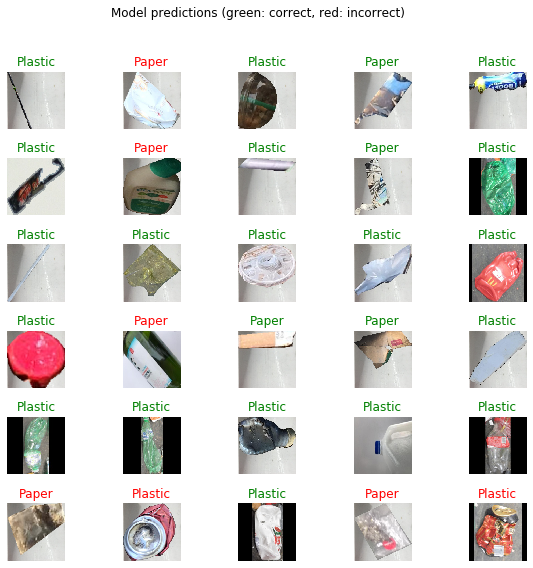

In [39]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")